### Determining clusters from the data.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Bharath Setty\Desktop\Sriraksha\Data Science\Datasets - for EDA - class given\Other Datasets\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df['Annual Income (k$)'].head(5)

0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64

In [24]:
df['Spending Score (1-100)'].head(5)

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

CONSIDERED COLUMNS :
    
 - NUMERICAL : Age (normalize), Annual Income (k$) (normalize), Spending Score(1-100) (normalize)
 - CATEGORICAL : Gender(encode)
 
NOT CONSIDERED COLUMN : CustomerID


### Encoding

In [13]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [14]:

df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Normalization

In [27]:

from sklearn.preprocessing import MinMaxScaler
df[['Age','Annual Income (k$)','Spending Score (1-100)']] = MinMaxScaler().fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])      # you can have any number of columns here
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959


### Missing Values

In [28]:
df.isnull().values.any()

False

In [29]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
# Creating scaled features

features = ['Age','Gender','Annual Income (k$)','Spending Score (1-100)']
scaled_features = df[features].values

In [31]:
scaled_features

array([[0.01923077, 1.        , 0.        , 0.3877551 ],
       [0.05769231, 1.        , 0.        , 0.81632653],
       [0.03846154, 0.        , 0.00819672, 0.05102041],
       [0.09615385, 0.        , 0.00819672, 0.7755102 ],
       [0.25      , 0.        , 0.01639344, 0.39795918],
       [0.07692308, 0.        , 0.01639344, 0.76530612],
       [0.32692308, 0.        , 0.02459016, 0.05102041],
       [0.09615385, 0.        , 0.02459016, 0.94897959],
       [0.88461538, 1.        , 0.03278689, 0.02040816],
       [0.23076923, 0.        , 0.03278689, 0.7244898 ],
       [0.94230769, 1.        , 0.03278689, 0.13265306],
       [0.32692308, 0.        , 0.03278689, 1.        ],
       [0.76923077, 0.        , 0.04098361, 0.14285714],
       [0.11538462, 0.        , 0.04098361, 0.7755102 ],
       [0.36538462, 1.        , 0.04098361, 0.12244898],
       [0.07692308, 1.        , 0.04098361, 0.79591837],
       [0.32692308, 0.        , 0.04918033, 0.34693878],
       [0.03846154, 1.        ,

In [33]:
# Using PCA to convert n-dimensional array into 2-dimensional array

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

In [53]:
features_2d

array([[ 0.53295542, -0.22784075],
       [ 0.51393907, -0.49307991],
       [-0.44626589,  0.08707859],
       [-0.47879569, -0.36661673],
       [-0.45198432,  0.00300619],
       [-0.47905919, -0.37382159],
       [-0.43069765,  0.29588454],
       [-0.48682386, -0.48573543],
       [ 0.59720084,  0.65030769],
       [-0.46852807, -0.23475757],
       [ 0.59471063,  0.61538677],
       [-0.47701748, -0.35344875],
       [-0.41158991,  0.55348602],
       [-0.47682392, -0.35359718],
       [ 0.56528242,  0.20358955],
       [ 0.51715368, -0.46633419],
       [-0.44449221,  0.09277798],
       [ 0.52189242, -0.40373564],
       [ 0.57308163,  0.30048935],
       [-0.47555073, -0.34740109],
       [ 0.55322264,  0.0212041 ],
       [ 0.52414077, -0.38353428],
       [-0.41744385,  0.45469933],
       [ 0.53041637, -0.3000585 ],
       [-0.41317979,  0.50279592],
       [ 0.52462364, -0.39147651],
       [-0.43124278,  0.25160046],
       [ 0.54117158, -0.16119671],
       [-0.43552899,

In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [37]:
wcss = []                                    # I am calculating the wcss value & storing it into one list
for i in range(1, 11):                       # I am using a 'for' loop to run b/w 1 to 11, basically it will take values from 1,2,3,4,...10
    kmeans = KMeans(n_clusters = i)          # I am creating my KMeans(number of clusters = i) so in the first iteration i=1
    
    # Fit the data points
    kmeans.fit(features_2d)                  # training my model 'kmeans' by fitting the values 'features_2d(n features data converted into 2 dimensional features data_in this problem1 n=6)'
    
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)             # kmeans.inertia_ will give us the 'wcss' value


In [38]:
wcss

[68.02922001471619,
 18.621698467784285,
 10.937503872767891,
 3.783200173227074,
 2.784375613825674,
 1.894270808803593,
 1.4347055778947269,
 1.1474106098830756,
 0.8873726507990682,
 0.7214701739277026]

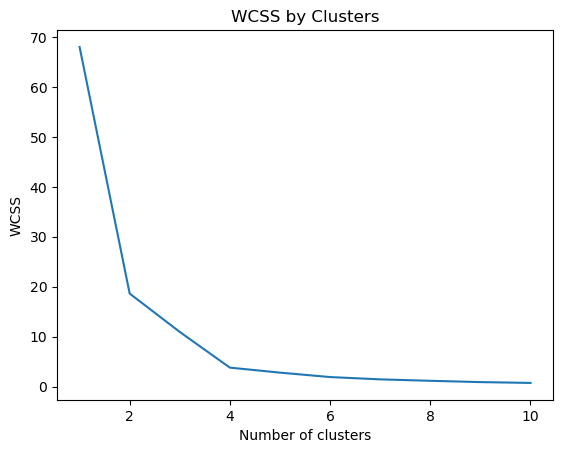

In [40]:
from matplotlib import pyplot as plt

plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, n_init=100, max_iter=1000)          # we know k=3(number of clusters), n_init(number of times you are going to initialize the random centroid, here 100 - I am not going to consider a model with dropping a centroid randomly once & assuming it is the best cluster, I am dropping 3 centroids 100 times[each of these 100 times I am dropping the 3 centroids randomly] & I am going to consider that particular model where we are going to get the best value of our wcss), max_iter is maximum iteration=1000(how many times a particular centroid is going to move in the cluster becoz there can b cases where the datapoints are too noisy & the centroid is not able to converge & training doesnt get terminated)  


# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features_2d)                                      # we are training the whole data in a single go becoz we do not have testing data (data is not splitted)
# View the cluster assignments
km_clusters


array([1, 1, 0, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 2, 0, 1, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 3, 2, 0, 3, 1, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 1, 3, 0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
       3, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1,
       2, 2, 3, 2, 0, 1, 1, 2, 0, 1, 2, 2, 3, 1, 3, 2, 0, 1, 3, 1, 0, 2,
       0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 0, 2,
       3, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 2, 0, 2, 3, 2, 0, 2, 0, 1,
       3, 1])

In [51]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'^'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.title('Assignments')
    plt.show()

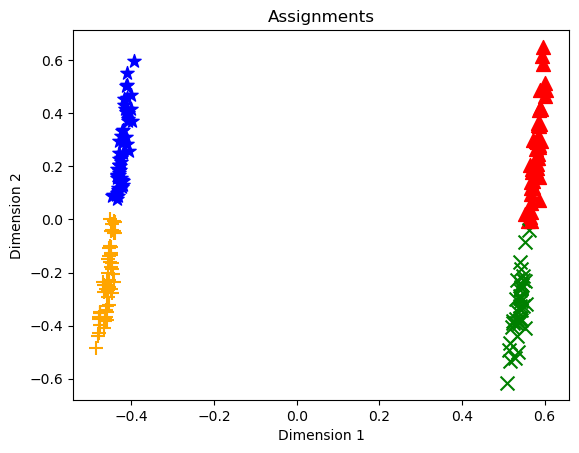

In [52]:
plot_clusters(features_2d, km_clusters)

INFERENCE : 

The following 4 clusters are obtained from the data.